In [1]:
import pylangacq
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
hc = pylangacq.read_chat('./data/DementiaBank/Pitt/Control/cookie') # healthy control
ad = pylangacq.read_chat('./data/DementiaBank/Pitt/Dementia/cookie') # Alzheimer's disease

print(f'Number of participants (Control): {hc.n_files()}')
print(f'Number of participants (Dementia): {ad.n_files()}')

Number of participants (Control): 243
Number of participants (Dementia): 309


## Histograms of utterances and wordsm

In [3]:
numu_hc = []
numw_hc = []
for f in hc:
    numu_hc.append(len(f.utterances(participants='PAR')))
    numw_hc.append(len(f.words(participants='PAR')))
    
numu_ad = []
numw_ad = []
for f in ad:
    numu_ad.append(len(f.utterances(participants='PAR')))
    numw_ad.append(len(f.words(participants='PAR')))

Text(0.5, 1.0, 'Histogram of Utterances')

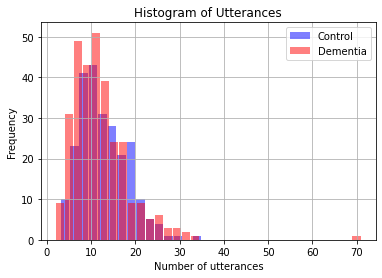

In [4]:
plt.hist(numu_hc, bins='auto', color='blue', alpha=0.5, rwidth=0.9)
plt.hist(numu_ad, bins='auto', color='red', alpha=0.5, rwidth=0.9)
plt.grid()
plt.legend(['Control','Dementia'])
plt.xlabel('Number of utterances')
plt.ylabel('Frequency')
plt.title('Histogram of Utterances')

Text(0.5, 1.0, 'Histogram of Words')

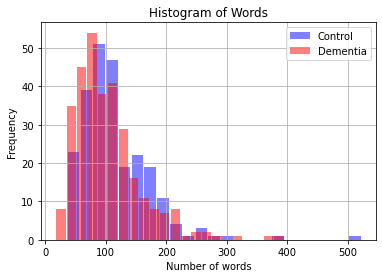

In [5]:
plt.hist(numw_hc, bins='auto', color='blue', alpha=0.5, rwidth=0.9)
plt.hist(numw_ad, bins='auto', color='red', alpha=0.5, rwidth=0.9)
plt.grid()
plt.legend(['Control','Dementia'])
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Histogram of Words')

# Check vocabulary

In [6]:
vocab_hc = []
for f in hc:
    words = f.words(participants='PAR')
    for w in words:
        if w not in vocab_hc:
            vocab_hc.append(w)
            
vocab_ad = []
for f in ad:
    words = f.words(participants='PAR')
    for w in words:
        if w not in vocab_ad:
            vocab_ad.append(w)

In [7]:
print(f'Vocab size (Control): {len(vocab_hc)}')
print(f'Vocab size (Dementia): {len(vocab_ad)}')

Vocab size (Control): 1166
Vocab size (Dementia): 1347


In [8]:
num_display = 30

wfreq_hc = hc.word_frequencies(participants='PAR')
print('Frequent words in Control')
print(wfreq_hc.most_common(num_display))

wfreq_ad = ad.word_frequencies(participants='PAR')
print('Frequent words in Dementia')
print(wfreq_ad.most_common(num_display))

Frequent words in Control
[('.', 2847), ('the', 2787), ('and', 1111), ('is', 1061), ('a', 745), ('to', 480), ('cookie', 437), ('on', 417), ('I', 371), ('in', 365), ('sink', 289), ('her', 289), ('stool', 284), ('dishes', 280), ("she's", 266), ('over', 253), ('water', 248), ('jar', 237), ('it', 221), ('boy', 215), ('little', 214), ("that's", 210), ('mother', 208), ('of', 208), ('see', 208), ('girl', 200), ("he's", 195), ('drying', 185), ('that', 185), ('window', 179)]
Frequent words in Dementia
[('.', 3313), ('the', 2765), ('and', 1469), ('is', 798), ('a', 726), ('I', 531), ('to', 481), ('on', 469), ('cookie', 417), ("she's", 374), ('in', 347), ('dishes', 346), ('over', 331), ('it', 331), ('jar', 316), ('stool', 307), ('that', 301), ("he's", 291), ('?', 291), ('water', 273), ('little', 271), ('sink', 253), ('her', 246), ('boy', 229), ('of', 212), ('see', 211), ('she', 208), ('up', 206), ('cookies', 205), ("that's", 199)]


## Save data for HRA 

In [8]:
hc_new = []
for f in hc:
    t = f.words(by_utterances=True, participants='PAR') # one transcript by utterances
    tnew = []
    for u in t:
        tnew.append(' '.join(u))
    hc_new.append('%'.join(tnew))
    
ad_new = []
for f in ad:
    t = f.words(by_utterances=True, participants='PAR')
    tnew = []
    for u in t:
        tnew.append(' '.join(u))
    ad_new.append('%'.join(tnew))

### Encode characters with numbers

In [9]:
# list of characters in the corpus
cha_hc = []
for t in hc_new:
    for c in t:
        if c not in cha_hc:
            cha_hc.append(c)
            
cha_ad = []
for t in ad_new:
    for c in t:
        if c not in cha_ad:
            cha_ad.append(c)

cha = []
for c in cha_hc+cha_ad:
    if c not in cha:
        cha.append(c)
print(cha)

['t', 'h', 'e', ' ', 's', 'c', 'n', 'i', 'k', '.', '%', 'm', 'o', 'r', 'w', 'p', 'g', 'd', 'a', 'u', 'f', 'l', 'b', 'y', 'j', "'", 'v', 'z', 'x', '?', 'I', ',', '_', '‡', '"', '/', 'q', 'J', '!', 'B', 'D', 'E', 'T', 'K', 'S', 'C', 'V', 'L', 'A', '„', 'H']


In [10]:
cha = sorted(cha)
hra_id = {}
for i,c in enumerate(cha):
    hra_id[c] = i
print(hra_id)

{' ': 0, '!': 1, '"': 2, '%': 3, "'": 4, ',': 5, '.': 6, '/': 7, '?': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'H': 14, 'I': 15, 'J': 16, 'K': 17, 'L': 18, 'S': 19, 'T': 20, 'V': 21, '_': 22, 'a': 23, 'b': 24, 'c': 25, 'd': 26, 'e': 27, 'f': 28, 'g': 29, 'h': 30, 'i': 31, 'j': 32, 'k': 33, 'l': 34, 'm': 35, 'n': 36, 'o': 37, 'p': 38, 'q': 39, 'r': 40, 's': 41, 't': 42, 'u': 43, 'v': 44, 'w': 45, 'x': 46, 'y': 47, 'z': 48, '„': 49, '‡': 50}


In [21]:
hc_hra = []
for t in hc_new:
    thra = []
    for c in t:
        thra.append(hra_id[c])
    hc_hra.append(thra)

ad_hra = []
for t in ad_new:
    thra = []
    for c in t:
        thra.append(hra_id[c])
    ad_hra.append(thra)

In [38]:
save_dir1 = Path.cwd()/'data'/'hra'/'control'
save_dir1.mkdir(parents=True, exist_ok=True)
save_dir2 = Path.cwd()/'data'/'hra'/'dementia'
save_dir2.mkdir(parents=True, exist_ok=True)

for n,t in enumerate(hc_hra):
    tnew = pd.DataFrame({'x':t})
    tnew.index.name = 'index'
    tnew.to_csv(save_dir1/(str(n)+'.csv'))
    
for n,t in enumerate(ad_hra):
    tnew = pd.DataFrame({'x':t})
    tnew.index.name = 'index'
    tnew.to_csv(save_dir2/(str(n)+'.csv'))

In [40]:
save_dir = Path.cwd()/'data'/'hra'

hc_hra = []
for t in hc_new:
    thra = []
    for c in t:
        thra.append(str(hra_id[c]))
    hc_hra.append(' '.join(thra))

ad_hra = []
for t in ad_new:
    thra = []
    for c in t:
        thra.append(str(hra_id[c]))
    ad_hra.append(' '.join(thra))
    
with open(save_dir/'hc_hra.txt', 'w') as f:
    f.writelines('\n'.join(hc_hra))
    
with open(save_dir/'ad_hra.txt', 'w') as f:
    f.writelines('\n'.join(ad_hra))